# 문제 정의
* 플랫폼 별 광고비 지출에 다른 판매량 분석 및 예측

# 데이터 수집
* https://www.kaggle.com/datasets/ashydv/advertising-dataset


# 라이브러리 불러오기

In [4]:
# ------------------------
# scikit-learn 설치 및 버전 확인
# ------------------------
# conda install scikit-learn

import sklearn
sklearn.__version__

'1.7.1'

<Axes: >

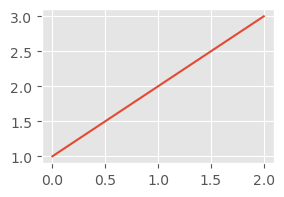

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [7]:
df = pd.read_csv('data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# 데이터 탐색

## 매체별 광고비에 따른 판매량

<Axes: xlabel='TV', ylabel='Sales'>

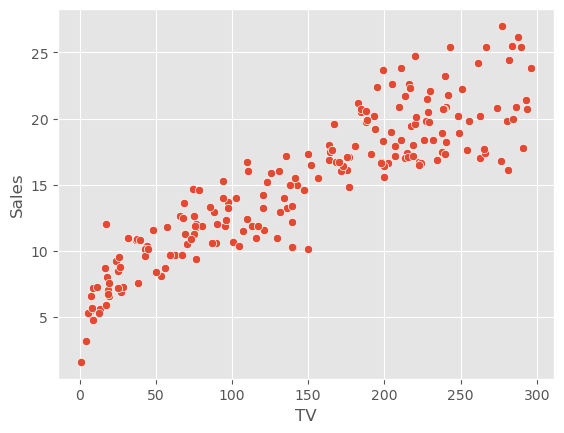

In [10]:
# TV와 Sales

sns.scatterplot(data=df, x='TV', y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

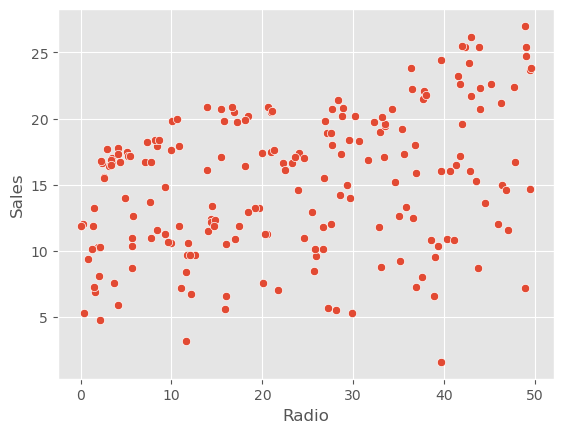

In [11]:
# Radio와 Sales

sns.scatterplot(data=df, x="Radio", y="Sales")

<Axes: xlabel='Newspaper', ylabel='Sales'>

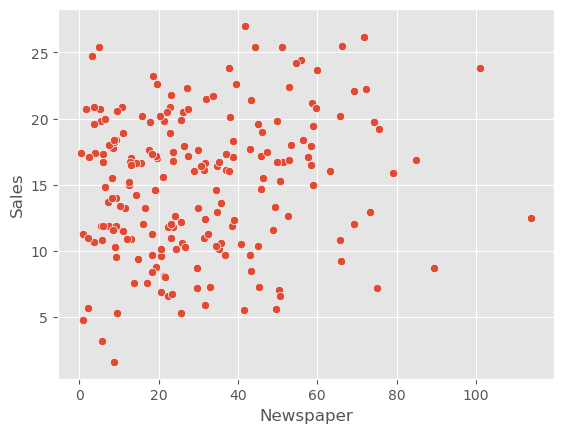

In [12]:
sns.scatterplot(data=df, x="Newspaper", y="Sales")

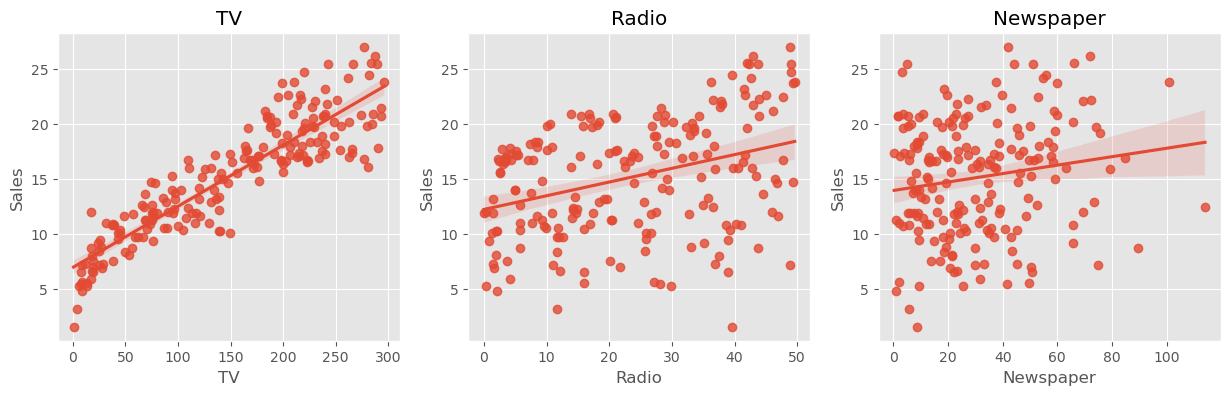

In [13]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
for i, feature_name in enumerate(df.columns[:3]):
    sns.regplot(data=df, x=feature_name, y='Sales', ax=ax[i])
    ax[i].set_title(feature_name)

## 상관계수

In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
df.corr().loc['Sales', 'TV' : 'Newspaper']

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

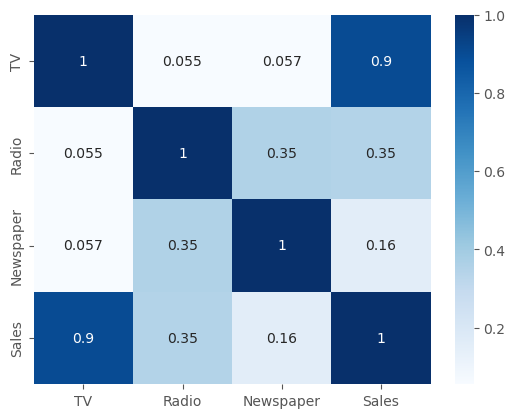

In [21]:
sns.heatmap(data = df.corr(), cmap='Blues', annot=True);

# 단순선형회귀
* TV광고량에 따른 판매량 예측

## 독립변수, 종속변수 선택

In [ ]:
X = df[['TV']] # 독립변수는 2차원이어야 함
y = df['Sales'] # 종속변수 1차원

pandas.core.series.Series

## 훈련세트, 테스트세트 분할

In [8]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


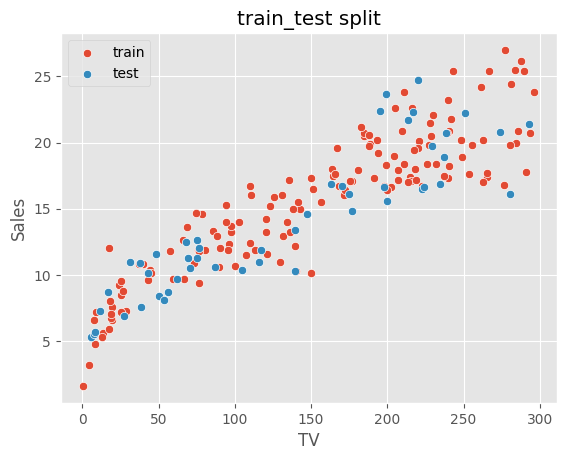

In [9]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할 확인
# ------------------------------------------
sns.scatterplot(x=X_train['TV'], y=y_train, label="train")
sns.scatterplot(x=X_test['TV'], y=y_test, label="test")
plt.legend()
plt.title("train_test split")
plt.xlabel('TV');

## 모델 생성 및 훈련

In [10]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

LinearRegression()

## 테스트세트로 평가
* **R2** 
    * 모델의 전반적인 성능(설명력)을 나타냄
        * 설명력 - 독립변수가 종속변수의 변동을 얼마나 잘 설명할 수 있는가
        * R2가 0.8이라면 모델이 80%를 설명할 수 있다. 20%는 모델에 포함되지 않은 요소들의 영향일 수 있다.
    * 0~1 사이로 정규화되어 있어 직관적으로 해석할 수 있음
    * 다른 모델 및 데이터셋과 비교하기 용이함      
* **RMSE**
    * MSE의 제곱근. 원본 데이터와 같은 단위를 가져 직관적으로 이해하기 쉬움
    * 오차를 제곱하므로 이상치에 민감
    * MAE와의 차이가 클수록 오차에 대한 이상치가 존재함을 의미
    * MAE와 비슷하다면 이상치가 거의 없거나 오차가 고르개 분포함을 의미
* MAE
    * 원본 데이터와 같은 단위를 가짐
* MSE
    * 오차를 제곱하기 때문에 해석하기 어려울 수 있음




In [11]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------
pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'R2  : {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'MSE : {mse:.2f}')



R2  : 0.80
RMSE: 2.35
MAE : 1.87
MSE : 5.51


In [12]:
# ------------------------------------------
# 실제값과 모델의 예측값 비교
# ------------------------------------------
df_pred = pd.DataFrame({'X_test':X_test['TV'], 
                        'y_test':y_test, 
                        'y_pred':pred})

df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [13]:
# ------------------------------------------
# 회귀모델의 평가점수 수동 계산
# ------------------------------------------

mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss/tss)

print(f'r2:{r2:.2f}')
print(f'rmse:{rmse:.2f}')
print(f'mae:{mae:.2f}')
print(f'mse:{mse:.2f}')

r2:0.80
rmse:2.35
mae:1.87
mse:5.51


## 모델의 학습 결과

In [14]:
print(f'회귀계수:{model.coef_}')
print(f'절편:{model.intercept_}')
print(f'회귀식:{model.coef_[0]} * TV + {model.intercept_}')

회귀계수:[0.05538653]
절편:7.098853680118275
회귀식:0.05538653085519158 * TV + 7.098853680118275


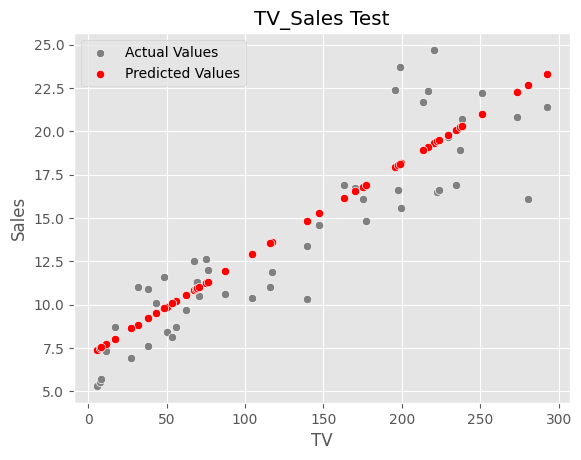

In [15]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------

sns.scatterplot(x=X_test['TV'], y=y_test, color='gray', label='Actual Values')  # 테스트데이터 실제값
sns.scatterplot(x=X_test['TV'], y=pred, color='red', label='Predicted Values')  # 테스트데이터 예측값
plt.xlabel('TV')
plt.title('TV_Sales Test')
pass


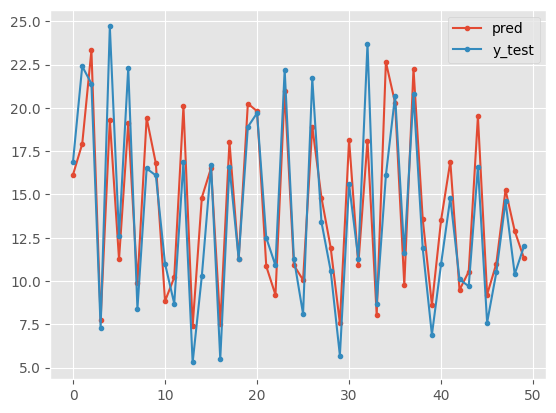

In [16]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------

plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test')
plt.legend()
pass

## 새로운 값 예측하기

In [17]:
# ----------------------------------
# TV 광고비 입력받기
# ----------------------------------
tv = 100
print(f'TV광고비 : {tv}')

# ----------------------------------
# 예측 함수 사용
# ----------------------------------
print(model.predict([[tv]]))

# ----------------------------------
# 모델이 학습한 공식에 대입
# ----------------------------------
print(model.coef_ * tv + model.intercept_)

TV광고비 : 100
[12.63750677]
[12.63750677]


c:\workspace\python\dataschool_준비용\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
